In [40]:
%matplotlib inline
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt
import scipy as sc
import numpy as np

cef=np.array([50,409,150, 126,-98, 140])*40/36
smto=np.array([87,132,158,270,50,132,172,212])/8
smzo=np.array([57,130,165,210,130,210])/8
smzoi=np.array([0.17,0.012,0.66,0.53,0.75,1.34])/1.34
print smto, smzo, smzoi

[10 16 19 33  6 16 21 26] [ 7 16 20 26 16 26] [ 0.12686567  0.00895522  0.49253731  0.39552239  0.55970149  1.        ]


[ 5.52677029  0.01      ] [ 1.8601597   0.03480101]
[ 0.01422575]


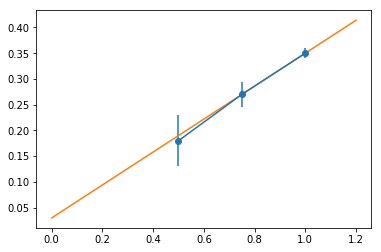

In [50]:
xye = np.array([[0.5, 0.18, 0.05],
                [0.75,0.27, 0.025],
                [1.0, 0.35, 0.01]])# field (T), gap (meV), error (meV)
def Zeeman(h,g,jz):
    return 0.0579*g*h + 6*jz*0.5

# Fit g and jz
popt, pcov = curve_fit(Zeeman, xye[1:,0], xye[1:,1], p0=[5.3,0.016],sigma=xye[1:,2], absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
print popt,perr
# Fit with g=5.3
popt0, pcov0 = curve_fit(lambda h,jz: Zeeman(h,5.3,jz), xye[1:,0], xye[1:,1], p0=[0.016],sigma=xye[1:,2], absolute_sigma=True)
perr0 = np.sqrt(np.diag(pcov0))
print popt0

# Plot
plt.figure()
plt.errorbar(xye[:,0], xye[:,1],xye[:,2],marker='o')
hs = np.linspace(0,1.2,50)
es = Zeeman(hs,popt[0],popt[1])
plt.plot(hs,es)
plt.show()

[ 6.14380903  2.28479298] 1


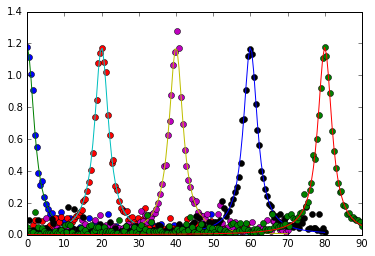

In [3]:
# multicureve fitting: def a global error
Mat_ydata=[]
Mat_angle=[]
Mat_xdata=[]

for c in range(0,100,20):
    num_points=c+100
    xdata=sc.linspace(0,num_points/2, num_points)
    ydata=5.1/((xdata-c)**2+2.1**2)+0.05*((0.5*sc.rand(num_points))*sc.exp(2*sc.rand(num_points)**2))
    Mat_angle.append(c) # the centers =[0, 20, 40, 60, 80] 
    Mat_ydata.append(ydata) # the xdata for the 5 peaks 
    Mat_xdata.append(xdata)

# print Mat_angle
# print Mat_xdata


def lor_func(x,c,par):
    a,b=par
    return a/((x-c)**2+b**2)

def err (p,c,x,y):
    return lor_func(x,c,p)-y

def err_global(p,Mat_a,Mat_x,Mat_y):
    err0=[]
    for i in range(0, len(Mat_a)):
        errc=err(p,Mat_a[i],Mat_x[i],Mat_y[i])
        err1=np.concatenate((err0,errc))
        err0=err1
    return err0

p_global=[1,1]
p_best,success=optimize.leastsq(err_global, p_global,args=(Mat_angle,Mat_xdata,Mat_ydata),maxfev=40000)
print p_best, success
toplot=[]
for i in range(0,len(Mat_angle)):
    toplot.append(lor_func(Mat_xdata[i],Mat_angle[i],p_best))
err_toplot=err_global(p_best,Mat_angle,Mat_xdata,Mat_ydata)

for i in range(0,len(Mat_angle)):
    plt.plot(Mat_xdata[i],Mat_ydata[i],'o',Mat_xdata[i],toplot[i],'-')
plt.show()

In [24]:
print Mat_x

NameError: name 'Mat_x' is not defined

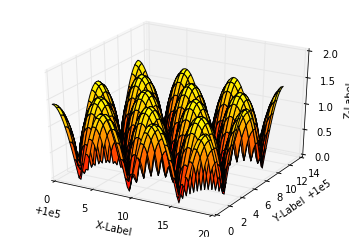

In [6]:
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# This example demonstrates mplot3d's offset text display.
# As one rotates the 3D figure, the offsets should remain oriented
# same way as the axis label, and should also be located "away"
# from the center of the plot.
#
# This demo triggers the display of the offset text for the x and
# y axis by adding 1e5 to X and Y. Anything less would not
# automatically trigger it.

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.sqrt(np.abs(np.cos(X) + np.cos(Y)))

surf = ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
ax.set_zlabel("Z-Label")
ax.set_zlim(0, 2)

plt.show()